# PREDICTION OF DIABETES USING DIFFERENT MACHINE LEARNING MODELS


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [4]:
dataset=pd.read_dbc('C:/Users/Manidhar/Desktop/breastCancer_Total.dbc')

AttributeError: module 'pandas' has no attribute 'read_dbc'

In [2]:
dataset.head()
dataset.info()

NameError: name 'dataset' is not defined

# Finding the co-relation 

In [56]:
corr=dataset.corr()

In [57]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [58]:
import seaborn as sns

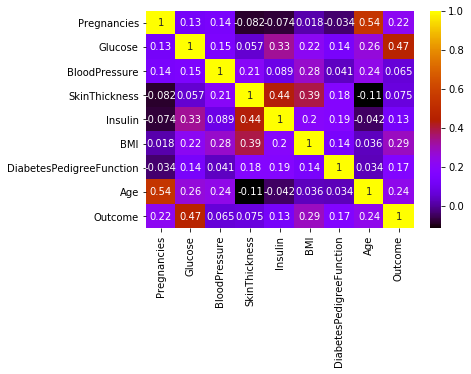

In [59]:
sns.heatmap(corr,annot=True,cmap='gnuplot')
plt.show()

# Identifying Dependent and Independent variables

In [60]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [61]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting the Dataset into train and test data

In [63]:
from sklearn.cross_validation import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [66]:
import statsmodels.api as sm

In [67]:
model=sm.OLS(y_train,x_train).fit()

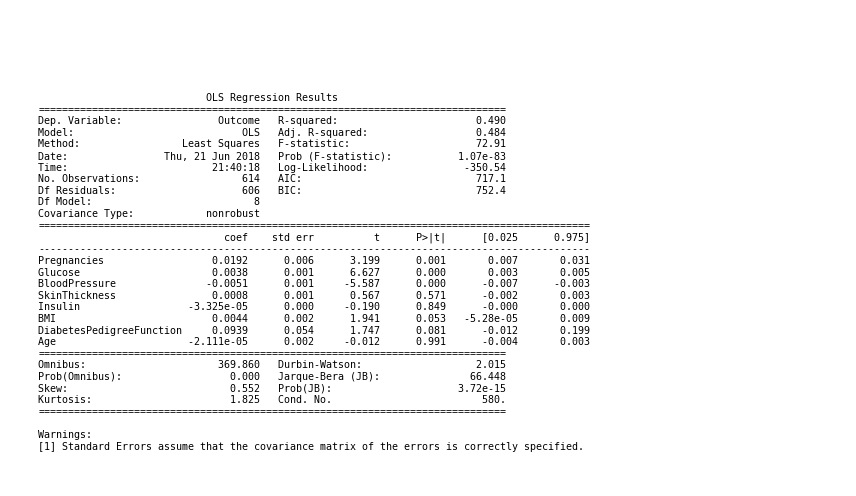

In [68]:
plt.rc('figure',figsize=(12,7))
plt.text(0.01,0.05,str(model.summary()),{'fontsize': 10},fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('C:/Users/manidhar/Desktop/machinel/summary.png') #create an image containing model summary

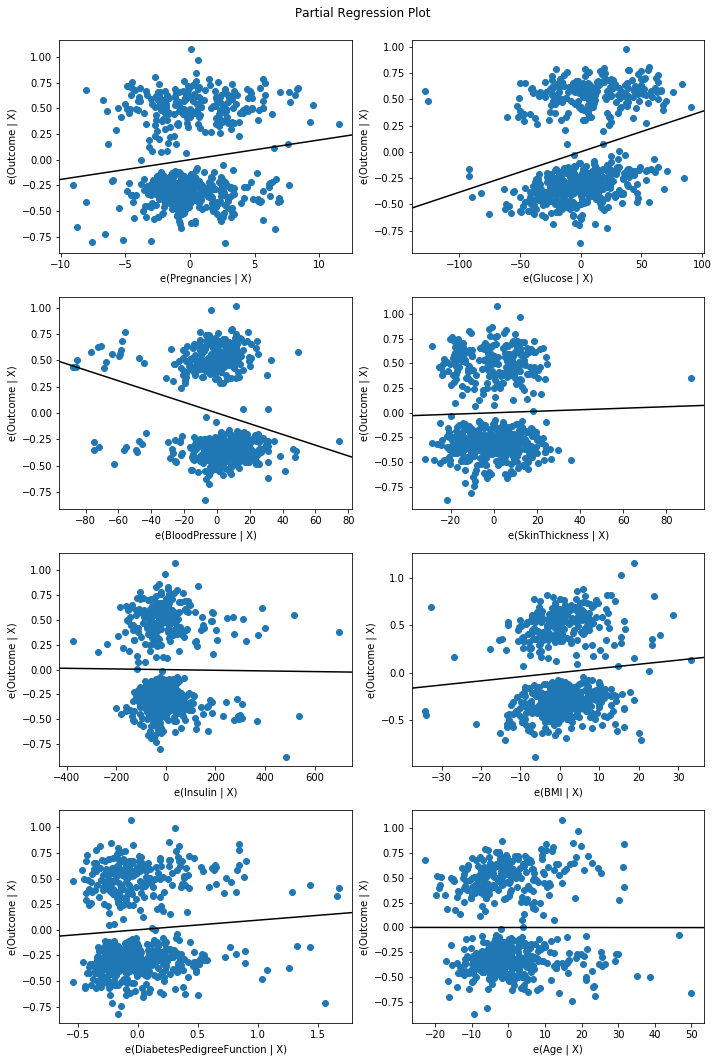

In [69]:
fig=plt.figure(figsize=(10,15))
sm.graphics.plot_partregress_grid(model,fig=fig)
fig.savefig('C:/Users/manidhar/Desktop/machinel/regressionplot.png') #saving the regressionplot as image

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [71]:
model_log=LogisticRegression(C=10.0)
model_knn=KNeighborsClassifier(n_neighbors=3)
model_svm=SVC(C=10.0,kernel='linear')
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier(n_estimators=100)

In [72]:
model_log.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_predict_log=model_log.predict(x_test)
y_predict_knn=model_knn.predict(x_test)
y_predict_svm=model_svm.predict(x_test)
y_predict_dt=model_dt.predict(x_test)
y_predict_rf=model_rf.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
import seaborn as sns

In [76]:
cm_log=confusion_matrix(y_test,y_predict_log)
cm_knn=confusion_matrix(y_test,y_predict_knn)
cm_svm=confusion_matrix(y_test,y_predict_svm)
cm_dt=confusion_matrix(y_test,y_predict_dt)
cm_rf=confusion_matrix(y_test,y_predict_rf)

# CLASSIFICATION Report

<Figure size 720x1080 with 0 Axes>

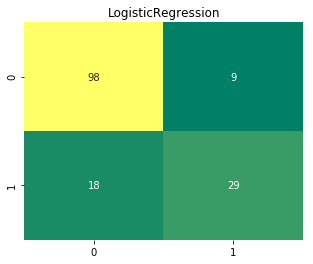

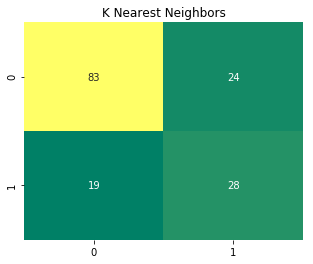

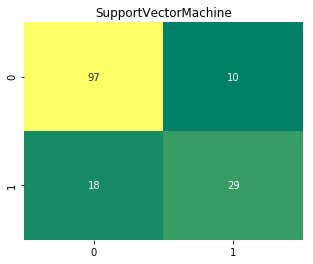

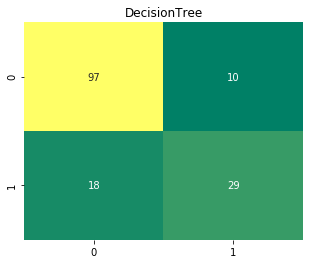

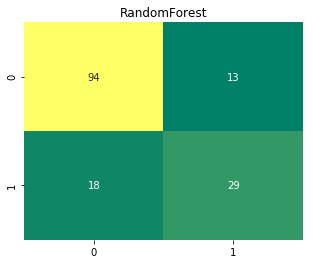

In [89]:
fig=plt.figure(figsize=(10,15))
plt.figure(figsize=(5,4))
sns.heatmap(cm_log,annot=True,cmap='summer',cbar=False)
plt.title('LogisticRegression')


plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('K Nearest Neighbors')


plt.figure(figsize=(5,4))
sns.heatmap(cm_svm,annot=True,cmap='summer',cbar=False)
plt.title('SupportVectorMachine')

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm,annot=True,cmap='summer',cbar=False)
plt.title('DecisionTree')


plt.figure(figsize=(5,4))
sns.heatmap(cm_rf,annot=True,cmap='summer',cbar=False)
plt.title('RandomForest')
plt.show()


# Generation of Classification Report

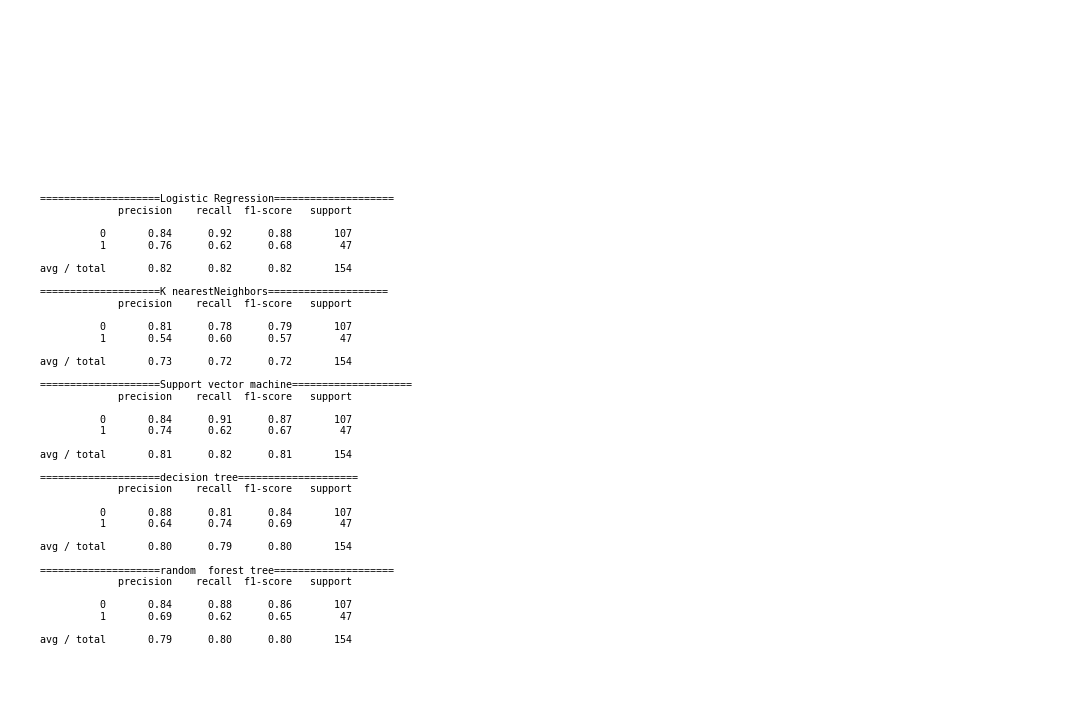

In [79]:
cr_log=classification_report(y_test,y_predict_log)
cr_knn=classification_report(y_test,y_predict_knn)
cr_svm=classification_report(y_test,y_predict_svm)
cr_dt=classification_report(y_test,y_predict_dt)
cr_rt=classification_report(y_test,y_predict_rf)
#Exporting the report as an image file
plt.rc('figure',figsize=(15,10))
plt.text(0.01,0.05,str(('\n'+'='*20+'Logistic Regression'+'='*20+'\n')+(cr_log)+('\n'+'='*20+'K nearestNeighbors'+'='*20+'\n')+(cr_knn)+('\n'+'='*20+'Support vector machine'+'='*20+'\n')+(cr_svm)+('\n'+'='*20+'decision tree'+'='*20+'\n')+(cr_dt)+('\n'+'='*20+'random  forest tree'+'='*20+'\n')+(cr_rt)),{'fontsize': 16},fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('C:/Users/manidhar/Desktop/machinel/classificationreport.png')
